# Dự đoán chỉ số NO2 sau 1 và 7 ngày

### Cài đặt thư viện

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Đọc file

In [34]:
# Đọc dữ liệu
df = pd.read_csv("D:/PPNC - Dự đoán NO2/DATASET_state_weather_aqi_data_PPNC.csv")

### Xử lý dữ liệu

In [37]:
df['Date'] = pd.to_datetime(df['Date (L )'], format="%m/%d/%Y %H:%M")
df = df.sort_values('Date')

features = ['PM2.5', 'PM10', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI']
df_model = df[['Date', 'NO2'] + features].copy()

df_model['NO2_1day_future'] = df_model['NO2'].shift(-24)
df_model['NO2_7day_future'] = df_model['NO2'].shift(-168)

df_model_cleaned = df_model.dropna().reset_index(drop=True)

### Huấn luyện Decision Tree

In [38]:
X = df_model_cleaned[features]
y_1day = df_model_cleaned['NO2_1day_future']
y_7day = df_model_cleaned['NO2_7day_future']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_1day, test_size=0.2, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y_7day, test_size=0.2, random_state=42)

model_1day = DecisionTreeRegressor(random_state=42)
model_7day = DecisionTreeRegressor(random_state=42)

model_1day.fit(X_train1, y_train1)
model_7day.fit(X_train7, y_train7)

DecisionTreeRegressor(random_state=42)

### Dự đoán và đánh giá

Kết quả dự đoán NO2 sau 1 ngày:
MSE: 1200.231884057971
R²: -0.03887842005797704


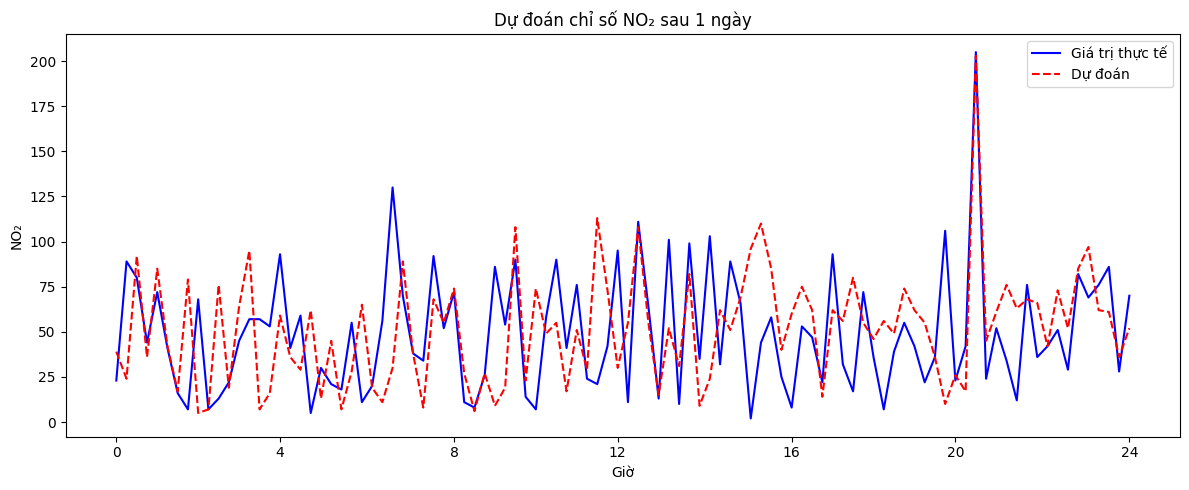


Kết quả dự đoán NO2 sau 7 ngày:
MSE: 1689.7173913043478
R²: -2.024974599934873


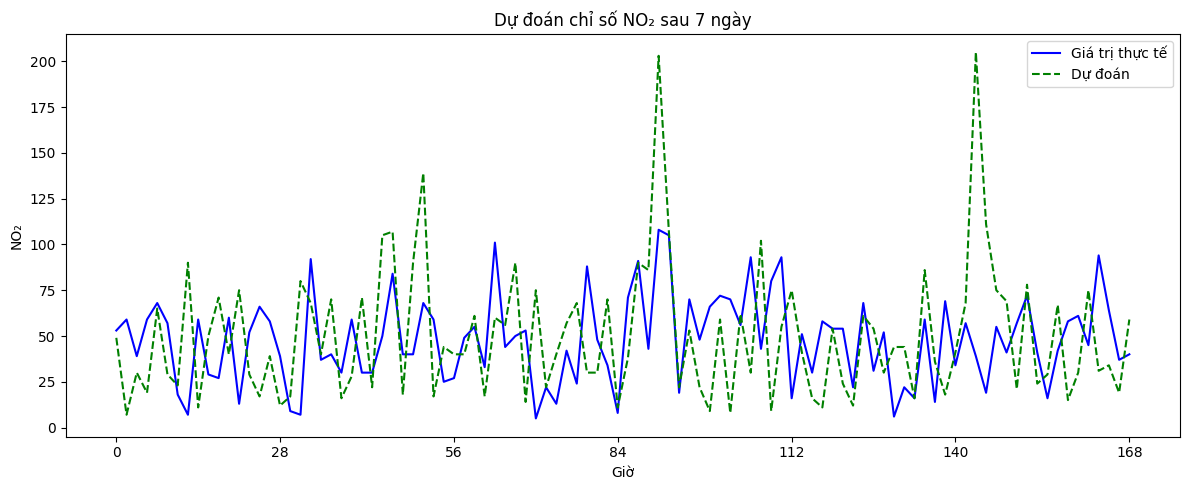

In [39]:
y_pred1 = model_1day.predict(X_test1)
y_pred7 = model_7day.predict(X_test7)

mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

mse7 = mean_squared_error(y_test7, y_pred7)
r27 = r2_score(y_test7, y_pred7)

# Sau 1 ngày:
print("Kết quả dự đoán NO2 sau 1 ngày:")
print("MSE:", mse1)
print("R²:", r21)

# Biểu đồ 1 ngày
plt.figure(figsize=(12, 5))
plt.plot(y_test1.values[:100], label='Giá trị thực tế', color='blue')
plt.plot(y_pred1[:100], label='Dự đoán', color='red', linestyle='--')
plt.title('Dự đoán chỉ số NO₂ sau 1 ngày')
plt.xlabel('Giờ')
plt.ylabel('NO₂')
plt.xticks(ticks=np.linspace(0, 99, 7).astype(int), labels=np.linspace(0, 24, 7).astype(int))
plt.legend()
plt.tight_layout()
plt.show()

# Sau 7 ngày:
print("\nKết quả dự đoán NO2 sau 7 ngày:")
print("MSE:", mse7)
print("R²:", r27)

# Biểu đồ 7 ngày
plt.figure(figsize=(12, 5))
plt.plot(y_test7.values[:100], label='Giá trị thực tế', color='blue')
plt.plot(y_pred7[:100], label='Dự đoán', color='green', linestyle='--')
plt.title('Dự đoán chỉ số NO₂ sau 7 ngày')
plt.xlabel('Giờ')
plt.ylabel('NO₂')
plt.xticks(ticks=np.linspace(0, 99, 7).astype(int),labels=np.linspace(0, 168, 7).astype(int))
plt.legend()
plt.tight_layout()
plt.show()